# Analyze the result of the model training

## Loading the data

In [19]:
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
with open('../../data/pickle/train_x.pickle', "rb") as f:
    train_x = pickle.load(f)
train_x.shape

(15257, 150, 150, 3)

In [3]:
with open('../../data/pickle/train_y.pickle', "rb") as f:
    train_y = pickle.load(f)
train_y.shape

(15257, 8)

In [4]:
with open('../../data/pickle/val_x.pickle', "rb") as f:
    val_x = pickle.load(f)
val_x.shape

(4768, 150, 150, 3)

In [5]:
with open('../../data/pickle/val_y.pickle', "rb") as f:
    val_y = pickle.load(f)
val_y.shape

(4768, 8)

In [6]:
with open('../../data/pickle/test_x.pickle', "rb") as f:
    test_x = pickle.load(f)
test_x.shape

(3815, 150, 150, 3)

In [7]:
with open('../../data/pickle/test_y.pickle', "rb") as f:
    test_y = pickle.load(f)
test_y.shape

(3815, 8)

## Evaluate the model MobileNetV2

In [16]:
model = tf.keras.models.load_model('../../mobilenetv2.h')

2023-02-14 17:36:29.000592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 17:36:29.000766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:36:29.000800: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-14 17:36:29.000824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-14 17:36:29.000847: W tensorflow/c

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']           

In [8]:
def get_matrix(model_for_prediction, x, y):
    x_pred = []
    y_true = []
    start = time.time()

    for index, data in enumerate(x):
        pred = model_for_prediction.predict(data[np.newaxis, ...])
        x_pred.append(np.argmax(pred[0], axis=- 1))
        y_true.append(np.argmax(y[index], axis=- 1))

    end = time.time()
    average_inference = (end - start) / len(x)
    return x_pred, y_true, average_inference

In [19]:
y_train_pred, y_train_true, train_average_inference_mobile = get_matrix(model, train_x, train_y)
y_test_pred, y_test_true, test_average_inference_mobile = get_matrix(model, test_x, test_y)

1/1 [==============================] - 0s 30ms/step


### Train data results

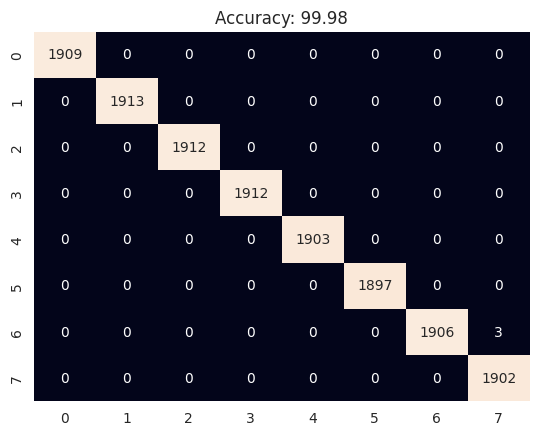

In [20]:
sns.heatmap(confusion_matrix(y_train_true, y_train_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_mobile = accuracy_score(y_train_true, y_train_pred) * 100
plt.title(f'Accuracy: {accuracy_train_mobile:2.2f}')
plt.show()

In [21]:
print(f"{train_average_inference_mobile * 1000:.2f} ms")

55.77 ms


### Test data results

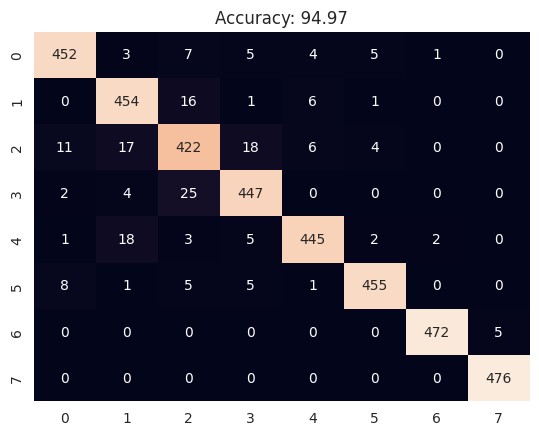

In [22]:
sns.heatmap(confusion_matrix(y_test_true, y_test_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_mobile = accuracy_score(y_test_true, y_test_pred) * 100
plt.title(f'Accuracy: {accuracy_test_mobile:2.2f}')
plt.show()

In [23]:
print(f"{test_average_inference_mobile * 1000:.2f} ms")

53.09 ms


## Evaluate the model ResNet50V2

In [24]:
model_resnet = tf.keras.models.load_model('../../resnet50v2.h')

In [25]:
model_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']       

In [26]:
y_train_res_pred, y_train_res_true, train_average_inference_res = get_matrix(model_resnet, train_x, train_y)
y_test_res_pred, y_test_res_true, test_average_inference_res = get_matrix(model_resnet, test_x, test_y)

1/1 [==============================] - 0s 52ms/step


### Train data results

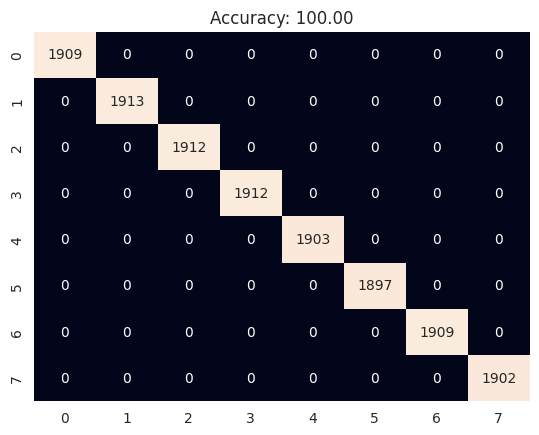

In [27]:
sns.heatmap(confusion_matrix(y_train_res_true, y_train_res_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_res = accuracy_score(y_train_res_true, y_train_res_pred) * 100
plt.title(f'Accuracy: {accuracy_train_res:2.2f}')
plt.show()

In [28]:
print(f"{train_average_inference_res * 1000:.2f} ms")

83.05 ms


### Test data results

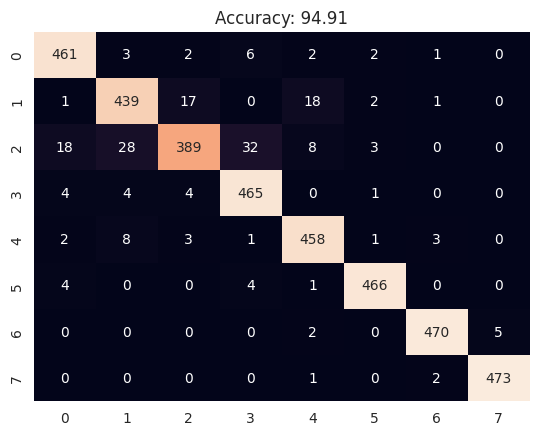

In [29]:
sns.heatmap(confusion_matrix(y_test_res_true, y_test_res_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_res = accuracy_score(y_test_res_true, y_test_res_pred) * 100
plt.title(f'Accuracy: {accuracy_test_res:2.2f}')
plt.show()

In [30]:
print(f"{test_average_inference_res * 1000:.2f} ms")

82.26 ms


## Evaluate the custom cnn model

In [9]:
model_custom = tf.keras.models.load_model('../../custom_model.h')

2023-02-15 07:26:13.680597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 07:26:13.680840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 07:26:13.680908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-15 07:26:13.680952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-15 07:26:13.680993: W tensorflow/c

In [10]:
model_custom.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 average_pooling2d (AverageP  (None, 17, 17, 128)     

In [11]:
y_train_custom_pred, y_train_custom_true, train_average_inference_custom = get_matrix(model_custom, train_x, train_y)
y_test_custom_pred, y_test_custom_true, test_average_inference_custom = get_matrix(model_custom, test_x, test_y)

1/1 [==============================] - 0s 23ms/step


### Train data results

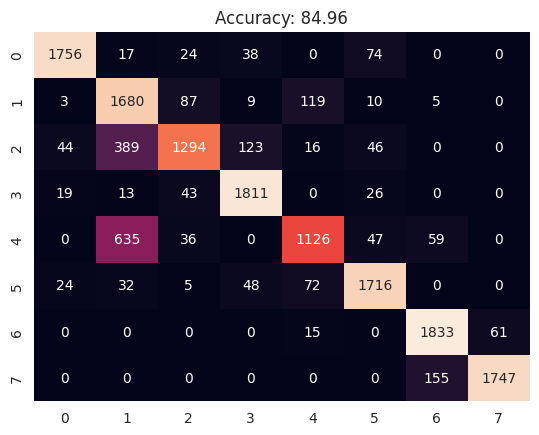

In [12]:
sns.heatmap(confusion_matrix(y_train_custom_true, y_train_custom_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_custom = accuracy_score(y_train_custom_true, y_train_custom_pred) * 100
plt.title(f'Accuracy: {accuracy_train_custom:2.2f}')
plt.show()

In [13]:
print(f"{train_average_inference_custom * 1000:.2f} ms")

52.73 ms


### Test data results

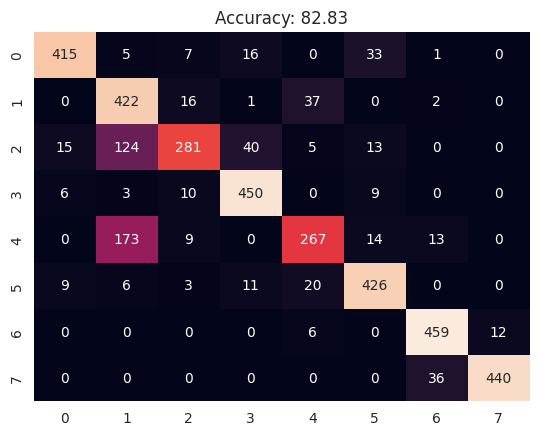

In [14]:
sns.heatmap(confusion_matrix(y_test_custom_true, y_test_custom_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_custom = accuracy_score(y_test_custom_true, y_test_custom_pred) * 100
plt.title(f'Accuracy: {accuracy_test_custom:2.2f}')
plt.show()

In [15]:
print(f"{test_average_inference_custom * 1000:.2f} ms")

46.60 ms


In [ ]:
% store train_average_inference_mobile
% store train_average_inference_res
% store test_average_inference_mobile
% store test_average_inference_res

% store accuracy_train_mobile
% store accuracy_train_res
% store accuracy_test_mobile
% store accuracy_test_res

In [16]:
% store train_average_inference_custom
% store test_average_inference_custom
% store accuracy_train_custom
% store accuracy_test_custom

Stored 'train_average_inference_custom' (float)
Stored 'test_average_inference_custom' (float)
Stored 'accuracy_train_custom' (float64)
Stored 'accuracy_test_custom' (float64)


In [17]:
% store -r

## Comparing the models

In [48]:
model_names = ['MobileNetV2', 'Resnet50V2', 'Custom CNN']
colors_models = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig = go.Figure(data=[
    go.Bar(name='Test Accuracy', x=model_names,
           y=[accuracy_test_mobile, accuracy_test_res, accuracy_test_custom],
           text=[f"{accuracy_test_mobile:2.2f}", f"{accuracy_test_res:2.2f}", f"{accuracy_test_custom:2.2f}"],
           marker_color=colors_models)
])
fig.update_layout(title_text='Test Accuracy', yaxis_title='Percent')
fig.show()

In [49]:
inference_mobile = train_average_inference_mobile * 1000
inference_res = train_average_inference_res * 1000
inference_custom = train_average_inference_custom * 1000

fig = go.Figure(data=[
    go.Bar(name='Inference Time', x=model_names,
           y=[inference_mobile, inference_res, inference_custom],
           text=[f"{inference_mobile:2.2f}", f"{inference_res:2.2f}", f"{inference_custom:2.2f}"],
           marker_color=colors_models),
])
fig.update_layout(title_text='Inference Time', yaxis_title='ms')
fig.show()

In [51]:
model_size = [4_310_728 / 1000000, 26_846_344 / 1000000, 3_653_192 / 1000000]

fig = go.Figure(data=[
    go.Bar(name='Model Size', x=model_names,
           y=model_size,
           text=[f"{model_size[0]:2.2f}", f"{model_size[1]:2.2f}", f"{model_size[2]:2.2f}"],
           marker_color=colors_models)
])
fig.update_layout(title_text='Test Accuracy', yaxis_title='Number of Parameters [M]')
fig.show()